In [2]:
import pandas as pd
import json
import os 
import requests
import csv 
import pandas as pd
import matplotlib.pyplot as plt 


In [8]:
df_snapshot_voters = pd.read_csv("snapshot_unique_voters.csv")
df_tally_voters = pd.read_csv("tally_unique_voters.csv")
df_tally_snap = pd.read_csv("tally_snap_unique_voter.csv")

In [94]:
df_voter_data=pd.read_csv('voter_data.csv')
df_basic_data=pd.read_csv('basic_data.csv')


In [99]:
import pandas as pd

# Read data from CSV file using pandas
# voter_data = pd.read_csv('basic_data.csv')

# Initialize an empty dictionary to store voter information
voter_dict = {}

# Iterate through the rows of the DataFrame
for index, row in df_basic_data.iterrows():
    proposal_id = row['proposal_id']
    voter = row['voter']
    voting_choice = row['voting_choice']
    voting_power = row['voting_power']

    # Check if voter exists in the dictionary, if not, initialize voter's data
    if voter not in voter_dict:
        voter_dict[voter] = {
            'address': voter,
            'total_proposals_in': 0,
            'for_votes': 0,
            'against_votes': 0,
            'abstain_votes': 0,
            'voting_power_used': 0
        }

    # Update voter's data based on their voting choice
    if voting_choice == 1:
        voter_dict[voter]['for_votes'] += 1
    elif voting_choice == 2:
        voter_dict[voter]['against_votes'] += 1
    elif voting_choice == 3:
        voter_dict[voter]['abstain_votes'] += 1

    # Update voting power used by the voter
    voter_dict[voter]['voting_power_used'] += voting_power

    voter_dict[voter]['total_proposals_in'] += 1

# Convert voter dictionary to DataFrame
output_df = pd.DataFrame(voter_dict.values())

# Reorder columns
output_df = output_df[['address', 'total_proposals_in', 'for_votes', 'against_votes', 'abstain_votes', 'voting_power_used']]


# Write DataFrame to CSV file with proper headers
output_df.to_csv('voter_data_output.csv', index=False)

print("Output file 'voter_data_output.csv' has been created successfully.")


Output file 'voter_data_output.csv' has been created successfully.


merge table

In [108]:

# Read the voter_data table from CSV

# Read the delegates table from CSV

# Merge the two tables based on account.id and voter.address

table_1=df_uniq_voter
table_2=df_snapshot_voters
table_1['voter.address']=table_1['voter.address'].str.lower()
table_2['address']=table_2['address'].str.lower()
# print(table_2)
merged_df = pd.merge(table_1, table_2,  left_on=['voter.address'],right_on=['address'], how='inner')

# Drop the extra 'account.id' column
merged_df.drop(columns=['address'], inplace=True)

data_file = "tally_snap_unique_voter.csv"  
print(len(merged_df))
# Save the merged DataFrame back to CSV
merged_df.to_csv(data_file, index=False)


96231


Q.3 Are there voters which vote only on Tally or on Snapshot proposals? What is their voting power in total?


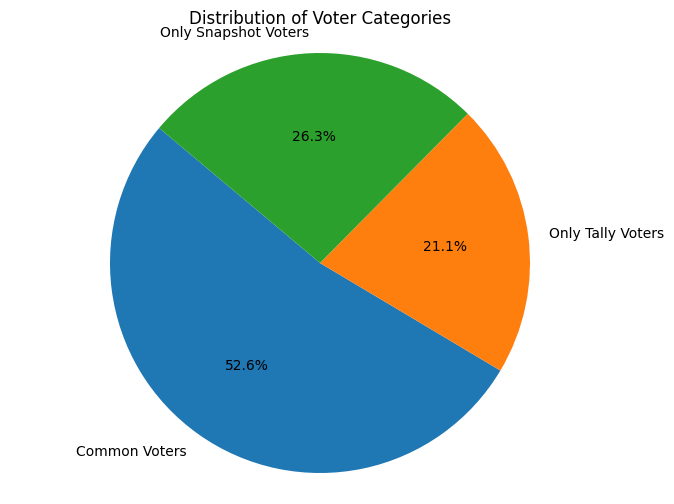

In [118]:

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV files
df_snapshot_voters = pd.read_csv("snapshot_unique_voters.csv")
df_tally_voters = pd.read_csv("tally_unique_voters.csv")
df_tally_snap = pd.read_csv("tally_snap_unique_voter.csv")
df_snapshot_voters['voter.address']=df_snapshot_voters['voter.address'].str.lower()
df_snapshot_voters.to_csv("snapshot_unique_voters.csv")
# Find common voters
common_voters = pd.merge(df_tally_voters, df_snapshot_voters, how='inner', on='voter.address')

# Find only tally voters (tally voters - common voters)
only_tally_voters = df_tally_voters[~df_tally_voters['voter.address'].isin(common_voters['voter.address'])]

# Find only snapshot voters (snapshot voters - common voters)
only_snapshot_voters = df_snapshot_voters[~df_snapshot_voters['voter.address'].isin(common_voters['voter.address'])]

# Calculate the number of voters in each category
num_common_voters = len(common_voters)
num_only_tally_voters = len(only_tally_voters)
num_only_snapshot_voters = len(only_snapshot_voters)

# Prepare data for the pie chart
labels = ['Common Voters', 'Only Tally Voters', 'Only Snapshot Voters']
sizes = [num_common_voters, num_only_tally_voters, num_only_snapshot_voters]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Voter Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


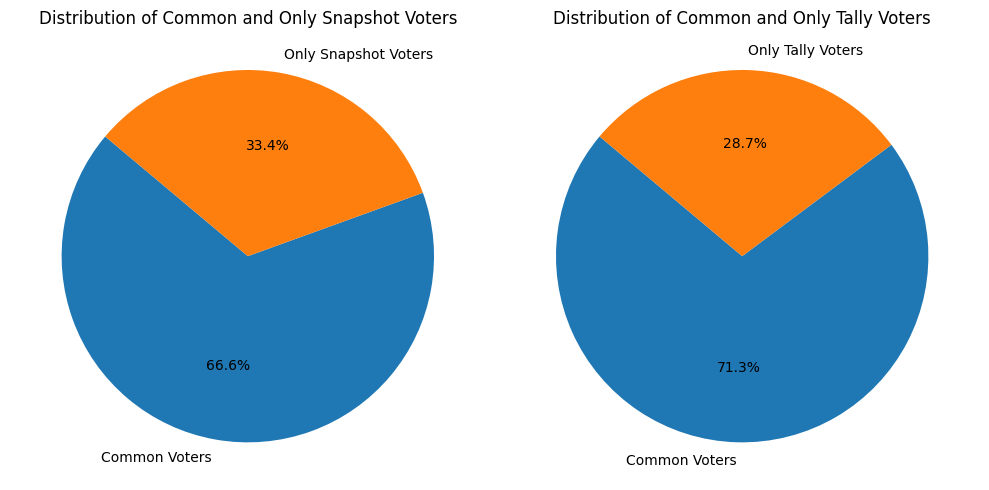

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV files
df_snapshot_voters = pd.read_csv("snapshot_unique_voters.csv")
df_tally_voters = pd.read_csv("tally_unique_voters.csv")
df_tally_snap = pd.read_csv("tally_snap_unique_voter.csv")
df_snapshot_voters['voter.address'] = df_snapshot_voters['voter.address'].str.lower()

# Find common voters
common_voters = pd.merge(df_tally_voters, df_snapshot_voters, how='inner', on='voter.address')

# Find only tally voters (tally voters - common voters)
only_tally_voters = df_tally_voters[~df_tally_voters['voter.address'].isin(common_voters['voter.address'])]

# Find only snapshot voters (snapshot voters - common voters)
only_snapshot_voters = df_snapshot_voters[~df_snapshot_voters['voter.address'].isin(common_voters['voter.address'])]

# Calculate the number of voters in each category
num_common_voters = len(common_voters)
num_only_tally_voters = len(only_tally_voters)
num_only_snapshot_voters = len(only_snapshot_voters)

# Prepare data for the pie chart for common and only snapshot voters
labels_snapshot = ['Common Voters', 'Only Snapshot Voters']
sizes_snapshot = [num_common_voters, num_only_snapshot_voters]

# Plot the pie chart for common and only snapshot voters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(sizes_snapshot, labels=labels_snapshot, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Common and Only Snapshot Voters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Prepare data for the pie chart for common and only tally voters
labels_tally = ['Common Voters', 'Only Tally Voters']
sizes_tally = [num_common_voters, num_only_tally_voters]

# Plot the pie chart for common and only tally voters
plt.subplot(1, 2, 2)
plt.pie(sizes_tally, labels=labels_tally, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Common and Only Tally Voters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Common Tally Voters Power: 3350418965.2400775
Common Snapshot Voters Power: 16251180406.35018
Only Tally Voters Power: 29048278.990319252
Only Snapshot Voters Power: 409940007.8299732


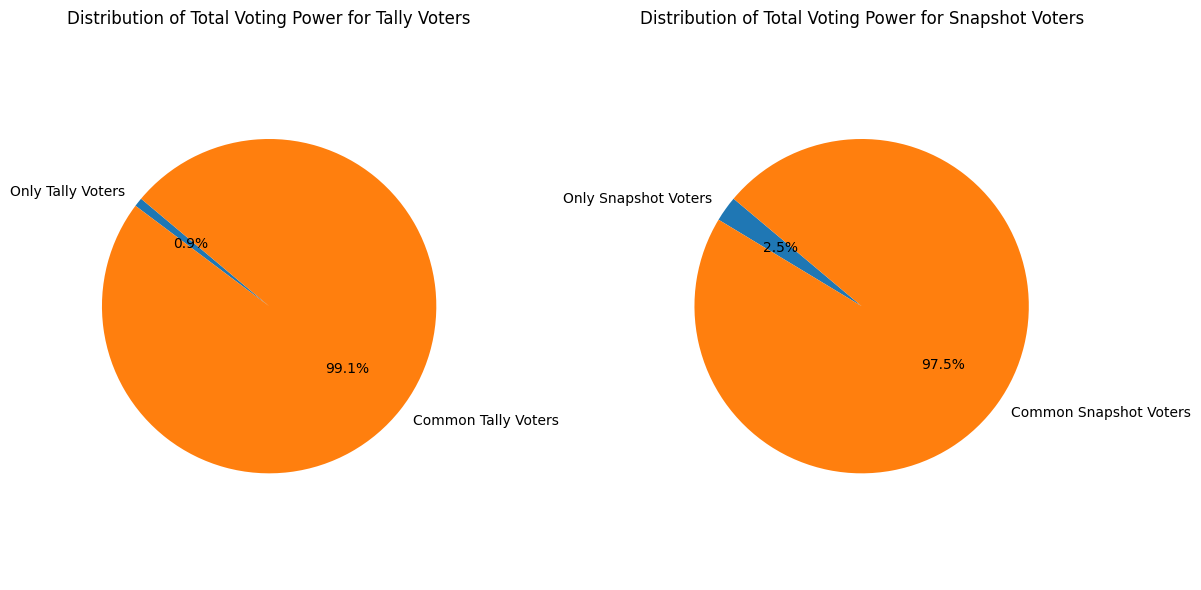

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df_snapshot_voters = pd.read_csv("snapshot_unique_voters.csv")
df_tally_voters = pd.read_csv("tally_unique_voters.csv")
df_tally_snap = pd.read_csv("tally_snap_unique_voter.csv")

# Calculate total voting power for common tally voters
comman_tally_voters_power = df_tally_snap['voting_power_t'].sum()
# Calculate total voting power for common snapshot voters
comman_snap_voters_power = df_tally_snap['voting_power_s'].sum()
# Calculate total voting power for only tally voters
only_tally_voters_power = df_tally_voters['voting_power'].sum() - comman_tally_voters_power
# Calculate total voting power for only snapshot voters
only_snap_voters_power = df_snapshot_voters['voting_power'].sum() - comman_snap_voters_power


# Print all calculated values
print("Common Tally Voters Power:", comman_tally_voters_power)
print("Common Snapshot Voters Power:", comman_snap_voters_power)
print("Only Tally Voters Power:", only_tally_voters_power)
print("Only Snapshot Voters Power:", only_snap_voters_power)



# Plotting the first pie chart for tally voters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
labels = ['Only Tally Voters', 'Common Tally Voters']
sizes = [only_tally_voters_power, comman_tally_voters_power]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Voting Power for Tally Voters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting the second pie chart for snapshot voters
plt.subplot(1, 2, 2)
labels = ['Only Snapshot Voters', 'Common Snapshot Voters']
sizes = [only_snap_voters_power, comman_snap_voters_power]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Voting Power for Snapshot Voters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


Q.4 How many voters with less than 1000 ARB participate in both platforms voting? Perform analysis to answer whether it is the fee that restricts, or the platform that restricts.


In [46]:
df_tally_snap = pd.read_csv("tally_snap_unique_voter.csv")

cnt_t=0
cnt_s=0
for power in df_tally_snap['voting_power_t']:
    if power>1000:
        cnt_t=cnt_t+1
    
for power in df_tally_snap['voting_power_s']:
    if power>1000:
        cnt_s=cnt_s+1
    
cnt_t

12417

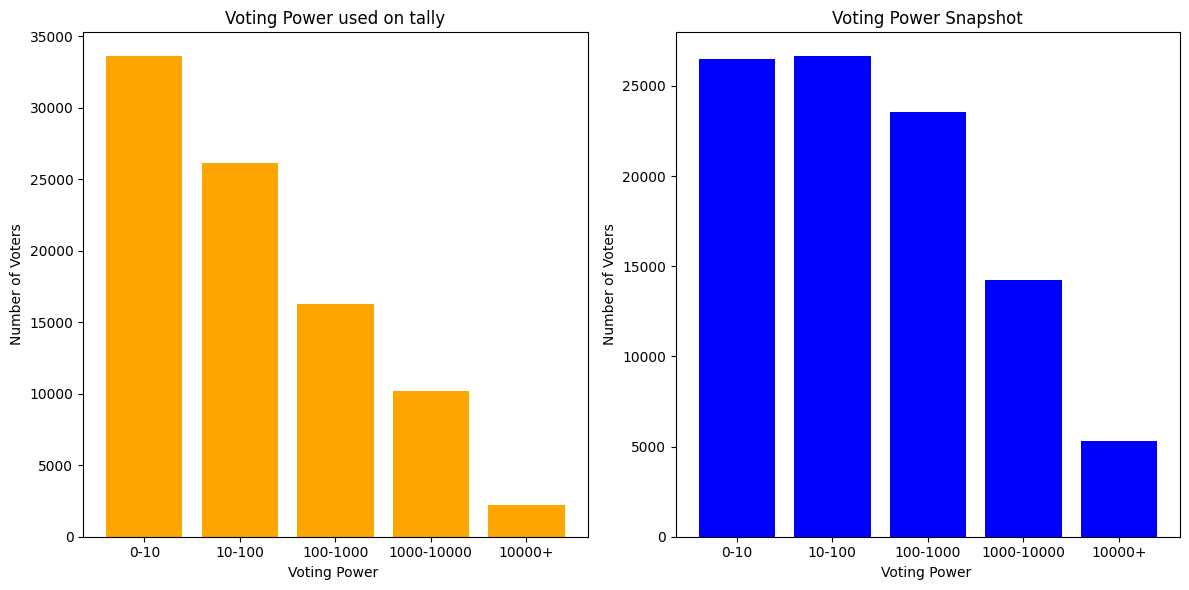

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('tally_snap_unique_voter.csv')

# Define the ranges for voting powers
ranges = [0, 10, 100, 1000, 10000, float('inf')]
labels = ['0-10', '10-100', '100-1000', '1000-10000', '10000+']

# Categorize voting_power_t and voting_power_s into the defined ranges
data['voting_power_t_category'] = pd.cut(data['voting_power_t'], bins=ranges, labels=labels)
data['voting_power_s_category'] = pd.cut(data['voting_power_s'], bins=ranges, labels=labels)

# Count the number of voters in each category for voting_power_t
voters_count_t = data['voting_power_t_category'].value_counts().sort_index()

# Count the number of voters in each category for voting_power_s
voters_count_s = data['voting_power_s_category'].value_counts().sort_index()

# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for voting_power_t
axs[0].bar(voters_count_t.index, voters_count_t.values, color='orange', label='Voting Power T')
axs[0].set_xlabel('Voting Power ')
axs[0].set_ylabel('Number of Voters')
axs[0].set_title('Voting Power used on tally')

# Plot histogram for voting_power_s
axs[1].bar(voters_count_s.index, voters_count_s.values, color='blue', label='Voting Power S')
axs[1].set_xlabel('Voting Power ')
axs[1].set_ylabel('Number of Voters')
axs[1].set_title('Voting Power Snapshot')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


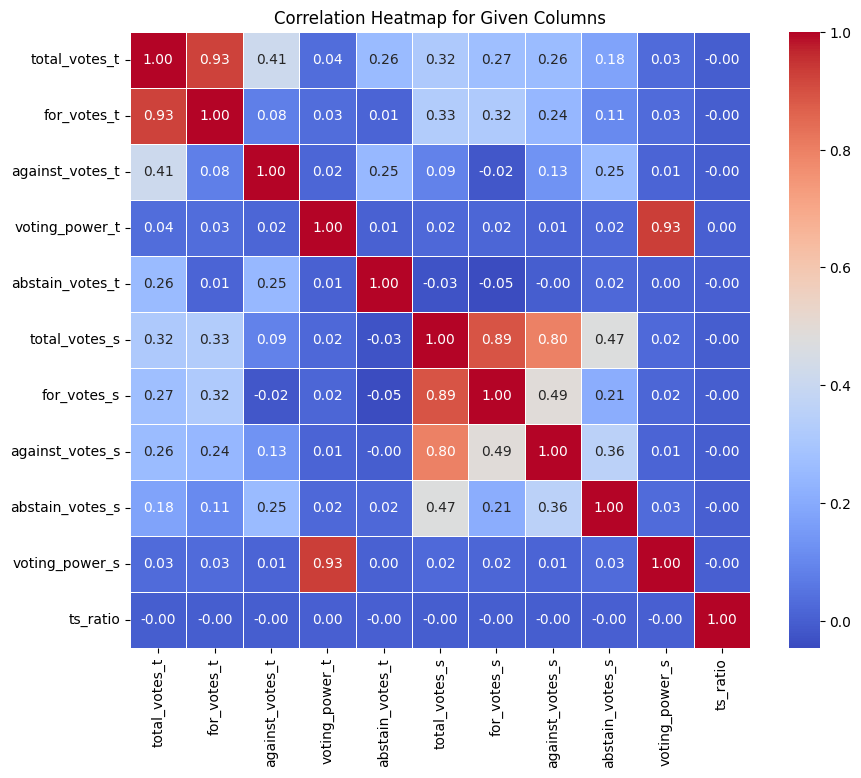

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('tally_snap_unique_voter.csv')

# Select only the columns of interest
columns_of_interest = ['total_votes_t', 'for_votes_t', 'against_votes_t', 'voting_power_t', 
                       'abstain_votes_t', 'total_votes_s', 'for_votes_s', 'against_votes_s', 
                       'abstain_votes_s', 'voting_power_s', 'ts_ratio']
data_subset = data[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Given Columns')
plt.show()


In [63]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo

# Step 1: Load the CSV file into a pandas DataFrame
df = pd.read_csv('tally_snap_unique_voter.csv')

# Step 2: Create samples with a 0.05 ts_ratio gap
ts_ratios = np.arange(0, 10.5, 0.05)

# Step 3: Group the samples based on ts_ratio and count the number of entries in each group
grouped = df.groupby(pd.cut(df['ts_ratio'], bins=ts_ratios)).size()

# Plot the bar graph
bar_trace = go.Bar(
    x=ts_ratios[:-1] + 0.025,
    y=grouped.values,
    width=0.05,
    marker_color='skyblue'
)

# Add vertical line at x=1
vline_trace = go.Scatter(
    x=[4.26, 4.26],
    y=[0, max(grouped.values)],
    mode='lines',
    name='x=1',
    line=dict(color='red', dash='dash')
)

# Plot an approximate curve around the bar graph
x = ts_ratios[:-1] + 0.025
y = grouped.values
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
curve_trace = go.Scatter(
    x=x,
    y=p(x),
    mode='lines',
    name='Approximate Curve',
    line=dict(color='orange')
)

# Create layout
layout = go.Layout(
    title='Distribution of Entries based on ts_ratio',
    xaxis=dict(title='ts_ratio'),
    yaxis=dict(title='Count'),
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)'
)

# Combine traces into a figure

# Combine traces into a figure
import plotly.io as pio

# Combine traces into a figure
fig = go.Figure(data=[bar_trace, vline_trace, curve_trace], layout=layout)

# Save interactive plot as HTML file
pio.write_html(fig, 'interactive_plot.html')

# Open the HTML file in your default web browser
import webbrowser
webbrowser.open('interactive_plot.html')

C:\Users\skpat\AppData\Local\Temp\ipykernel_25340\227069763.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



True